<a href="https://colab.research.google.com/github/RoiLe/AI-picture-recognition/blob/Roi-dev/demo_AI_img_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science final project - [proposal]
#### by Lior Guetta & Roi Levi

<h1>(1) Problem description</h1>



In today's digital age, the rise of artificial intelligence has brought us to a time when it's tricky to tell if a picture is real or made by a computer, AI-powered tools now have the capability to produce images that can be virtually indistinguishable from those captured by a camera. This project is dedicated to the critical task of discerning between genuine and AI-generated images.

The proliferation of AI-generated images presents a unique set of challenges. With the potential for images to be manipulated or fabricated, it becomes imperative to develop robust methods for distinguishing fact from fiction. This project aims to address this issue by exploring techniques that can reliably determine whether an image was created by an AI tool or is a product of the physical world.

Throughout this project, we will go deeply into various aspects of image analysis, datasets containing both authentic and AI-generated images, and advanced computational methods. By doing so, we aim to provide a valuable contribution to the ongoing discourse on the credibility of digital visuals.


> Indented block


As we embark on this journey to distinguish real from AI-generated images, we invite you to join us in unraveling the complexities of this modern-day challenge. Together, we aspire to contribute to a future where digital images can be scrutinized and trusted with confidence.



In a world where image generators are on the rise, there is a need to understand which images are real or which images were created by a machine. This situation is important to us for many scenarios, for example if we take it to the news, now we can easily create an image that will show a situation that never happened before, or for example we can steal copyrights by creating a similar image of a well-known artist, and that's just the tip of the iceberg.

For these reasons, we chose to produce a reliability measure for images.

#### requirements

In [ ]:
%pip install opendatasets
%pip install pandas
%pip install seaborn

#### imports

In [6]:
import opendatasets as od
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import shutil
import random
import numpy as np
from PIL import Image
import seaborn as sns


## Data Collection

#### kaggle DS
##### 120K of FAKE&REAL images

In [ ]:
od.download("https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

Your Kaggle Key:Downloading cifake-real-and-ai-generated-synthetic-images.zip to .\cifake-real-and-ai-generated-synthetic-images


100%|██████████| 105M/105M [05:56<00:00, 307kB/s]  


first of all see some random data

In [ ]:
# reading the XLSX file
fake_folder =('cifake-real-and-ai-generated-synthetic-images\\train\FAKE')

images_path = []
for filename in os.listdir(fake_folder):
  img = os.path.join(fake_folder,filename)
  if img is not None:
      images_path.append(img)

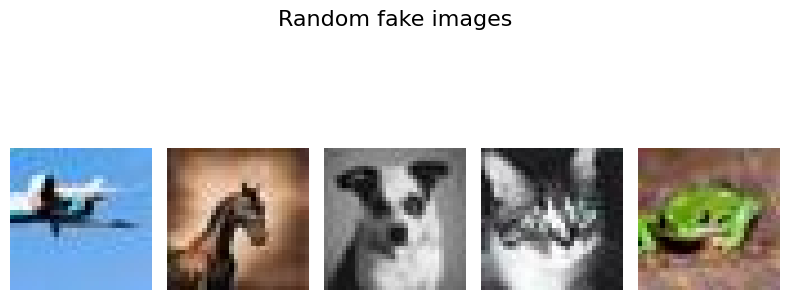

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt

# Create a figure with 5 subplots side by side
fig, axes = plt.subplots(1, 5, figsize=(8, 4))
fig.suptitle("Random fake images", fontsize=16)

# Loop to display 5 random FAKE images
for i in range(5):
    j = random.randint(0, 39999)
    image = cv2.imread(images_path[j])

    # Check if the image was loaded successfully
    if image is not None:
        # Displaying the image in the corresponding subplot
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    else:
        print(f"Error loading image {images_path[j]}")

# Remove axis labels and ticks
for ax in axes:
    ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()


<h1>(2) EDA</h1>

In our quest to distinguish authentic images from AI-generated ones, Exploratory Data Analysis (EDA) plays a pivotal role.

EDA is our compass through the sea of data, guiding us to uncover critical insights about image characteristics.

Our primary focus during this analysis will revolve around four key aspects: **the number of colors, sharpness, brightness, and contrast.**

Through this focused EDA, we aim to uncover unique insights into these specific image attributes, enabling us to make informed decisions regarding data preprocessing, feature selection, and model development.

Our journey through these aspects of image analysis will be instrumental in building a robust system for differentiating between real and AI-generated images.






In [ ]:
# path to the directories:
base_path = './cifake-real-and-ai-generated-synthetic-images'
TEST, TRAIN = 'test', 'train'
REAL, FAKE = 'REAL', 'FAKE'
test_fake = os.listdir('./cifake-real-and-ai-generated-synthetic-images/test/FAKE')
test_real = os.listdir('./cifake-real-and-ai-generated-synthetic-images/test/REAL')
train_fake = os.listdir('./cifake-real-and-ai-generated-synthetic-images/train/FAKE')
train_real = os.listdir('./cifake-real-and-ai-generated-synthetic-images/train/REAL')

In [ ]:
# some variables..
arr_fake = []
arr_real = []
arr_fake_num_colors = []
arr_real_num_colors = []
arr_fake_sharpness = []
arr_real_sharpness = []
arr_fake_brightness = []
arr_real_brightness = []
arr_fake_contrast = []
arr_real_contrast = []
max_colors = 10000
total_colors_fake = 0
total_colors_real = 0
total_sharpness_fake = 0
total_sharpness_real = 0
total_brightness_fake = 0
total_brightness_real = 0
total_contrast_fake = 0
total_contrast_real = 0

We will go through all the images from each ds and examine:
1) The number of colors in the picture.
2) the sharpness of the image.
3) The contrast of the colors in the picture.
4) The clarity of the image

A. Fake images loop:

In [ ]:
for picture in train_fake :
    # read & open image
    image = cv2.imread(os.path.join(base_path, TRAIN, FAKE, picture))
    img = Image.open(os.path.join(base_path, TRAIN, FAKE, picture))

    # convert to gray scale image.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # 1. number of colors
    total_colors_fake = total_colors_fake +(len(img.getcolors(max_colors)))
    # 2. sharpeness
    sharpness = cv2.Laplacian(gray, cv2.CV_64F).var()
    total_sharpness_fake = total_sharpness_fake + sharpness
    arr_fake_sharpness.append(sharpness)
    # 3. brightness
    brightness = int(gray.mean())
    # 4. contarst
    contrast = np.std(gray)
    total_contrast_fake = total_contrast_fake +contrast
    arr_fake_contrast.append(contrast)
    total_brightness_fake = total_brightness_fake+brightness
    arr_fake_brightness.append(brightness)
    arr_fake_num_colors.append(len(img.getcolors(max_colors)))
    arr_fake.append(image)

B. Real images loop:

In [ ]:
for picture in train_real :
    # read & open image
    image = cv2.imread(os.path.join(base_path, TRAIN, REAL, picture))
    img = Image.open(os.path.join(base_path, TRAIN, REAL, picture))

     # convert to gray scale image.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # 1. number of colors
    total_colors_real = total_colors_real +(len(img.getcolors(max_colors)))
    # 2. sharpeness
    sharpness = cv2.Laplacian(gray, cv2.CV_64F).var()
    total_sharpness_real = total_sharpness_real + sharpness
    arr_real_sharpness.append(sharpness)
    # 3. brightness
    brightness = int(gray.mean())
    # 3. contarst
    contrast = np.std(gray)
    total_contrast_real = total_contrast_real + contrast
    arr_real_contrast.append(contrast)
    total_brightness_real = total_brightness_real+brightness
    arr_real_brightness.append(brightness)
    arr_real_num_colors.append(len(img.getcolors(max_colors)))
    arr_real.append(image)

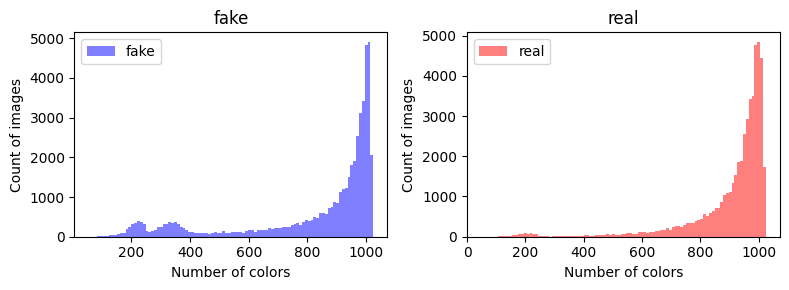

Average number of colors for fake images:  826.076
Average number of colors for real images:  907.034


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))  # 1 row, 2 columns
# Plot histogram for dataset 1 in the first subplot
axes[0].hist(arr_fake_num_colors, bins=100, alpha=0.5, color='blue', label='fake')
axes[0].set_xlabel('Number of colors')
axes[0].set_ylabel('Count of images')
axes[0].set_title('fake')
axes[0].legend()

# Plot histogram for dataset 2 in the second subplot
axes[1].hist(arr_real_num_colors, bins=100, alpha=0.5, color='red', label='real')
axes[1].set_xlabel('Number of colors')
axes[1].set_ylabel('Count of images')
axes[1].set_title('real')
axes[1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
print('Average number of colors for fake images: ',round((total_colors_fake/len(train_fake)),3))
print('Average number of colors for real images: ',round((total_colors_real/len(train_real)),3))

<b>Number of colors</b>

We can derive from these graphical representations that fake images exhibit a reduced color spectrum. Notably, we discern three prominent peaks in the values at 200, 350, and 1000 within the fake images, whereas in the case of real images, these peaks are predominantly confined to the 1000 values.

This insight holds the potential to assist us in future endeavors.

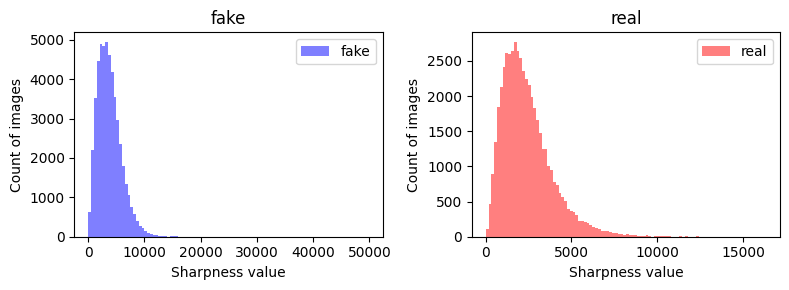

Average sharpness for fake images:  3772.899
Average sharpness for real images:  2432.842


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))  # 1 row, 2 columns
# Plot histogram for dataset 1 in the first subplot
axes[0].hist(arr_fake_sharpness, bins=100, alpha=0.5, color='blue', label='fake')
axes[0].set_xlabel('Sharpness value')
axes[0].set_ylabel('Count of images')
axes[0].set_title('fake')
axes[0].legend()

# Plot histogram for dataset 2 in the second subplot
axes[1].hist(arr_real_sharpness, bins=100, alpha=0.5, color='red', label='real')
axes[1].set_xlabel('Sharpness value')
axes[1].set_ylabel('Count of images')
axes[1].set_title('real')
axes[1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

print('Average sharpness for fake images: ',round((total_sharpness_fake/len(train_fake)),3))
print('Average sharpness for real images: ',round((total_sharpness_real/len(train_real)),3))

<b>Sharpness</b>

An intriguing deduction arising from our graphical representations is the unexpected observation that, on average, fake images manifest a significantly higher degree of sharpness, surpassing real images by a remarkable 50%. This rather surprising revelation bears the potential to assume a critical role in our differentiation efforts.

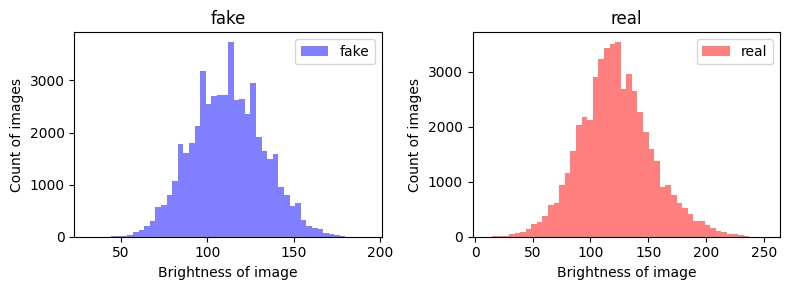

Average brightness for fake images:  111.762
Average brightness for real images:  122.098


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))  # 1 row, 2 columns
# Plot histogram for dataset 1 in the first subplot
axes[0].hist(arr_fake_brightness, bins=100, alpha=0.5, color='blue', label='fake')
axes[0].set_xlabel('Brightness of image')
axes[0].set_ylabel('Count of images')
axes[0].set_title('fake')
axes[0].legend()

# Plot histogram for dataset 2 in the second subplot
axes[1].hist(arr_real_brightness, bins=100, alpha=0.5, color='red', label='real')
axes[1].set_xlabel('Brightness of image')
axes[1].set_ylabel('Count of images')
axes[1].set_title('real')
axes[1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

print('Average brightness for fake images: ',round((total_brightness_fake/len(train_fake)),3))
print('Average brightness for real images: ',round((total_brightness_real/len(train_real)),3))

<b>Brightness</b>

These graphical representations exhibit striking similarities, albeit with subtle differentiations. Notably, real images display a marginally higher level of brightness compared to their AI-generated counterparts. While this discrepancy may initially appear inconsequential, it may potentially emerge as a pertinent factor contributing to the efficacy of the forthcoming Convolutional Neural Network (CNN) we intend to construct.

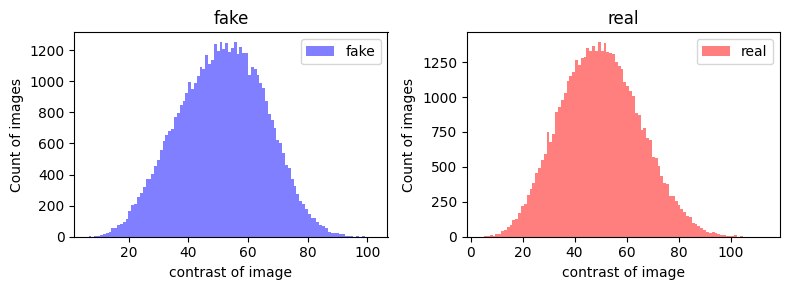

Average contrast for fake images:  51.224
Average contrast for real images:  49.995


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))  # 1 row, 2 columns
# Plot histogram for dataset 1 in the first subplot
axes[0].hist(arr_fake_contrast, bins=100, alpha=0.5, color='blue', label='fake')
axes[0].set_xlabel('contrast of image')
axes[0].set_ylabel('Count of images')
axes[0].set_title('fake')
axes[0].legend()

# Plot histogram for dataset 2 in the second subplot
axes[1].hist(arr_real_contrast, bins=100, alpha=0.5, color='red', label='real')
axes[1].set_xlabel('contrast of image')
axes[1].set_ylabel('Count of images')
axes[1].set_title('real')
axes[1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

print('Average contrast for fake images: ',round((total_contrast_fake/len(train_fake)),3))
print('Average contrast for real images: ',round((total_contrast_real/len(train_real)),3))

<b>Contrast</b>

It is evident that these datasets exhibit a near-identical profile, distinguished by a subtle variation: fake images demonstrate a marginally higher average, albeit a mere 2% difference, which is essentially negligible. This parallels the negligible variation we've observed in brightness values. Our interest now lies in discerning whether these minute distinctions may hold relevance for potential enhancement of our Convolutional Neural Network (CNN) in subsequent phases of our analysis.

<b>Conclusions</b>

In our pursuit of distinguishing genuine from AI-generated images, our Exploratory Data Analysis (EDA) has uncovered vital insights. We've observed substantial disparities in the number of colors and sharpness between real and fake images, underscoring their potential as discriminators in our image authenticity verification system. These findings provide a solid foundation for further analysis and model development.

On the other hand, our investigation into brightness and contrast revealed negligible variations between the two image categories. While it's uncertain how significant these statistics will be, they present an interesting avenue for exploration. The stability and consistency observed in brightness and contrast statistics might, albeit uncertainly, contribute to the effectiveness of our Convolutional Neural Network (CNN).

<h1>(3) Basic Algoritms</h1>

In this chapter we will see a number of algorithms that will guide us to build the ideal model, we will see how HOGs analyzes the gradients of the images, we will use GANs and even try to convert the images to their frequency domain and look for certain relationships there. Hopefully at the end of the process we can build a model with ideal prediction.

<h2>HOGS</h2>

Histogram of Oriented Gradients (HOG) is a potent image analysis technique that excels at capturing texture and shape details by analyzing local gradients within images. This method provides valuable insights into these structural features, aiding in the differentiation between authentic and AI-generated images. HOG's resilience to lighting and color variations makes it a key tool in enhancing image authenticity verification systems.

In [78]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage.feature import hog
from skimage import exposure
from skimage.color import rgb2gray


<h4>HOGs preprocess</h4>

In [79]:

# Function to load and process image data from a directory
def load_images_from_directory(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # Assuming your images are JPEG files
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path)
            img = np.array(img)  # Convert the image to a NumPy array
            data.append(img)
    return np.array(data)


In [80]:

# Function to compute HOG features for a list of images
def compute_hog_features(images):
    flag = 1
    hog_features = []
    for img in images:
        gray_img = rgb2gray(img)
        # Compute HOG features
        fd, hog_image = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(fd)
        if(flag == 1):
            # Plot gradient histogram
            plt.figure(figsize=(5, 5))
            plt.subplot(121)
            plt.imshow(gray_img, cmap=plt.cm.gray)
            plt.title('Input Image')

            # Rescale histogram for better visualization
            hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

            # Plot HOG features
            plt.subplot(122)
            plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
            plt.title('HOG Features')
            plt.show()
            flag = 0
    return hog_features



In [ ]:
# Directory paths
train_fake_dir = "cifake-real-and-ai-generated-synthetic-images\\train\FAKE"
train_real_dir = "cifake-real-and-ai-generated-synthetic-images\\train\REAL"
test_fake_dir = "cifake-real-and-ai-generated-synthetic-images\\test\FAKE"
test_real_dir = "cifake-real-and-ai-generated-synthetic-images\\test\REAL"


In [83]:
# Load image data from the directories
train_fake_data = load_images_from_directory(train_fake_dir)
train_real_data = load_images_from_directory(train_real_dir)

<h4>input & output example </h4>

on the left we can see the origin image and on the right the gradientd we extracted from the image.

the next step is to reduce the dimension becuase every image has 324 gradients. 

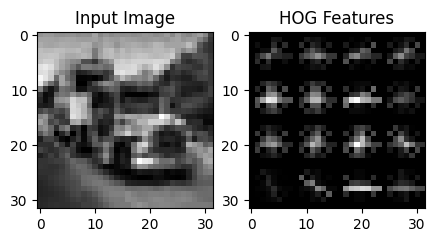

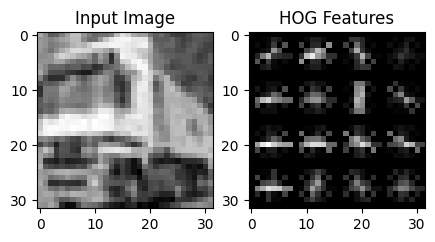

In [84]:
# Compute HOG features for the datasets
train_fake_hog = compute_hog_features(train_fake_data)
train_real_hog = compute_hog_features(train_real_data)


<h4>Dimension reduction</h4>

Lets reduce the dimension.
and then we will see if there are some differences. 

first we will see it on 2D and then on 3D.

In [85]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 800

slice = 160

# Initialize arrays to store (x, y) points
points_fake = []
points_real = []


fake_sample_indices = random.sample(range(len(train_fake_hog)), num_samples)
real_sample_indices = random.sample(range(len(train_real_hog)), num_samples)

# Compute (x, y) points for fake images
for i in fake_sample_indices:
    fake_hog_data = train_fake_hog[i]

    x = np.mean(fake_hog_data[:slice])  # Mean of the first half
    y = np.mean(fake_hog_data[slice:])  # Mean of the second half
    points_fake.append((x, y))

# Compute (x, y) points for real images
for j in real_sample_indices:
    real_hog_data = train_real_hog[j]
    x = np.mean(real_hog_data[:slice])  # Mean of the first half
    y = np.mean(real_hog_data[slice:])  # Mean of the second half
    points_real.append((x, y))

# Convert the lists of (x, y) points to NumPy arrays
points_fake = np.array(points_fake)
points_real = np.array(points_real)

# 2D

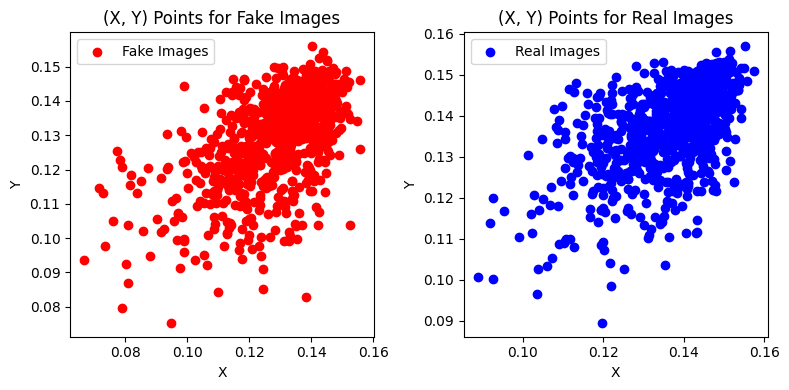

In [86]:
# Create two side-by-side scatter plots for (x, y) points
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

# Scatter plot for fake images
axes[0].scatter(points_fake[:, 0], points_fake[:, 1], color='red', label='Fake Images')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].set_title('(X, Y) Points for Fake Images')

# Scatter plot for real images
axes[1].scatter(points_real[:, 0], points_real[:, 1], color='blue', label='Real Images')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].set_title('(X, Y) Points for Real Images')

# Add a legend to the plots
axes[0].legend()
axes[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


<b>2D conclusion</b>

As we can see in the charts above, which contain 800 random observations per class.

The main distribution is concentrated on the upper right side in both and there is no essential difference between the distribution of the gradients.

We will now see if there is any difference in 3D.

# 3D

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random


num_samples = 800

slice_A = 105
slice_B = 210

# Initialize arrays to store (x, y, z) points
points_fake = []
points_real = []


fake_sample_indices = random.sample(range(len(train_fake_hog)), num_samples)
real_sample_indices = random.sample(range(len(train_real_hog)), num_samples)

# Compute (x, y, z) points for fake images
for i in fake_sample_indices:
    fake_hog_data = train_fake_hog[i]
    x = np.mean(fake_hog_data[:slice_A])  
    y = np.mean(fake_hog_data[slice_A:slice_B])  
    z = np.mean(fake_hog_data[slice_B:])
    points_fake.append((x, y, z))

# Compute (x, y, z) points for real images
for j in real_sample_indices:
    real_hog_data = train_real_hog[j]
    x = np.mean(real_hog_data[:slice_A])  
    y = np.mean(real_hog_data[slice_A:slice_B])  
    z = np.mean(real_hog_data[slice_B:]) 
    points_real.append((x, y, z))

# Convert the lists of (x, y, z) points to NumPy arrays
points_fake = np.array(points_fake)
points_real = np.array(points_real)



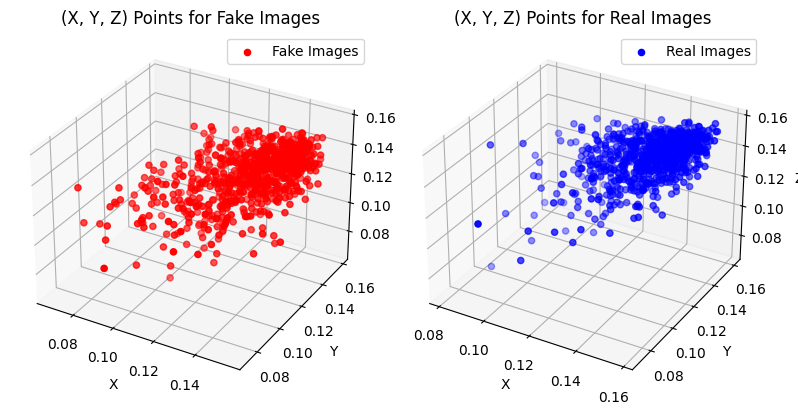

In [88]:
# Create two side-by-side 3D scatter plots for (x, y, z) points
fig = plt.figure(figsize=(8, 4))

# 3D scatter plot for fake images
ax_fake = fig.add_subplot(121, projection='3d')
ax_fake.scatter(points_fake[:, 0], points_fake[:, 1], points_fake[:, 2], color='red', label='Fake Images')
ax_fake.set_xlabel('X')
ax_fake.set_ylabel('Y')
ax_fake.set_zlabel('Z')
ax_fake.set_title('(X, Y, Z) Points for Fake Images')

# 3D scatter plot for real images
ax_real = fig.add_subplot(122, projection='3d')
ax_real.scatter(points_real[:, 0], points_real[:, 1], points_real[:, 2], color='blue', label='Real Images')
ax_real.set_xlabel('X')
ax_real.set_ylabel('Y')
ax_real.set_zlabel('Z')
ax_real.set_title('(X, Y, Z) Points for Real Images')

# Add a legend to the plots
ax_fake.legend()
ax_real.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

<b>3D conculsion</b>

Here too we examined 800 random observations,

 and it can be seen that there is no significant difference in their distribution.

<b>HOGs conclution</b>

After testing this algorithm, we downsized and tried both in 2D and 3D, it seems that the behavior of the images from both classes is relatively the same and it is not possible to conclude at this stage about a significant difference that will help us analyze the data.

We will continue to examine different algorithms.

<h2>GANS</h2>

Generative Adversarial Networks (GANs) are advanced AI models that play a crucial role in our mission to distinguish between genuine and AI-generated images. GANs consist of a generator and a discriminator, engaged in an adversarial training process. The generator creates synthetic data, striving to produce images that are indistinguishable from real ones, while the discriminator's task is to tell real from fake. This competitive training dynamic pushes GANs to generate increasingly convincing synthetic data. In our project, we utilize GANs to create AI-generated images and analyze their unique features, which provides critical insights for building models to discern between authentic and AI-generated visuals, addressing the challenges posed by image manipulation and verification in today's digital landscape.


<h1>Frequency Domain</h1>

After we saw some algorithms on the spatial domain lets examine our data in frequency domain.

Frequency domain is a method of analyzing an image by examining its component frequencies rather than its pixel values. It involves transforming an image from the spatial domain (pixel-based representation) into the frequency domain (representation based on sinusoidal components like sine and cosine waves). This is useful because it allows us to uncover hidden patterns, remove noise, and enhance specific image features more effectively than in the spatial domain, making it a valuable tool for tasks like image filtering, compression, and analysis. 

<h4>calculate FFT of every image</h4>

Here a new dataset will be created in which each image will be replaced by its representation in the frequency domain.

In [ ]:
import os
import cv2
import numpy as np

# Define input and output directories
input_dir = "cifake-real-and-ai-generated-synthetic-images"
output_dir = "freq-real-fake-images-2"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# List of image categories (e.g., "Real" and "Fake")
categories = ["test", "train"]

# Loop through each category
for category in categories:
    category_dir = os.path.join(input_dir, category)
    output_category_dir = os.path.join(output_dir, category)
    os.makedirs(output_category_dir, exist_ok=True)
 
    # List of subdirectories (e.g., "train" and "test")
    subdirectories = ["FAKE", "REAL"]
    
    # Loop through each subdirectory
    for subdirectory in subdirectories:
        view_flag = 1
        input_subdir = os.path.join(category_dir, subdirectory)
        output_subdir = os.path.join(output_category_dir, subdirectory)
        os.makedirs(output_subdir, exist_ok=True)
        
        # Process each image in the subdirectory
        for filename in os.listdir(input_subdir):
            input_path = os.path.join(input_subdir, filename)
            output_path = os.path.join(output_subdir, filename)
            
            # Read the image
            image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
            
            # Perform FFT (Fast Fourier Transform) to calculate the frequency domain
            freq_domain = np.fft.fft2(image)
            freq_domain = np.fft.fftshift(freq_domain)
            
            # Save the frequency domain image
            cv2.imwrite(output_path, np.abs(freq_domain).astype(np.uint8))



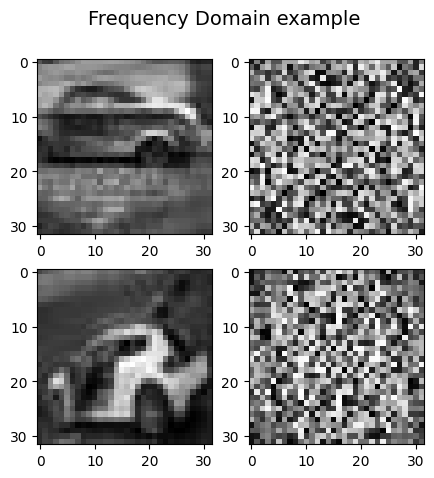

In [93]:
import cv2

# Plot information
fig, axes = plt.subplots(2, 2, figsize=(5, 5))
fig.suptitle("Frequency Domain example", fontsize=14)

fake_spatial_image = cv2.imread(r"cifake-real-and-ai-generated-synthetic-images\\test\FAKE\\0 (2).jpg", cv2.IMREAD_GRAYSCALE)
fake_frequency_image = cv2.imread(r"freq-real-fake-images-2\\test\FAKE\\0 (2).jpg", cv2.IMREAD_GRAYSCALE)
real_spatial_image = cv2.imread(r"cifake-real-and-ai-generated-synthetic-images\\test\REAL\\0000 (2).jpg", cv2.IMREAD_GRAYSCALE)
real_frequency_image = cv2.imread(r"freq-real-fake-images-2\\test\REAL\\0000 (2).jpg", cv2.IMREAD_GRAYSCALE)    

axes[0, 0].imshow(fake_spatial_image, cmap=plt.cm.gray)
axes[0, 1].imshow(fake_frequency_image, cmap=plt.cm.gray)
axes[1, 0].imshow(real_spatial_image, cmap=plt.cm.gray)
axes[1, 1].imshow(real_frequency_image, cmap=plt.cm.gray)
plt.show()  

2) build CNN for the frequency domain data

first split into val, train and test.

In [ ]:
import shutil

# Set paths
input_folder = "freq-real-fake-images"
output_folder = "NEW-freq-real-fake-images"

train_ratio = 0.8
validation_ratio = 0.2

# List classes
classes = ["FAKE", "REAL"]

# Create folders
for folder in ["train", "val", "test"]:
    os.makedirs(os.path.join(output_folder, folder, "FAKE"), exist_ok=True)
    os.makedirs(os.path.join(output_folder, folder, "REAL"), exist_ok=True)

# Loop through classes and split
for class_name in classes:
    class_folder = os.path.join(input_folder, "train", class_name)
    files = os.listdir(class_folder)
    random.shuffle(files)

    train_count = int(train_ratio * len(files))
    val_count = int(validation_ratio * len(files))

    train_files = files[:train_count]
    val_files = files[train_count:train_count + val_count]
    test_files = files[train_count + val_count:]

    for file in train_files:
        src = os.path.join(class_folder, file)
        dest = os.path.join(output_folder, "train", class_name, file)
        shutil.copy(src, dest)

    for file in val_files:
        src = os.path.join(class_folder, file)
        dest = os.path.join(output_folder, "val", class_name, file)
        shutil.copy(src, dest)

    for file in test_files:
        src = os.path.join(class_folder, file)
        dest = os.path.join(output_folder, "test", class_name, file)
        shutil.copy(src, dest)


Now we have the data in frequncy domain and already seperated inside the directory "freq-real-fake-images",
it's ready to pattern recognition 

In [ ]:
train_datagen = ImageDataGenerator(
    brightness_range = (0.2, 1.4),
    zoom_range = [0.5, 1.5]
)
training_set = train_datagen.flow_from_directory(
    'NEW-freq-real-fake-images\\train',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 80000 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory('NEW-freq-real-fake-images\\val',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 20000 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(x = training_set, validation_data = val_set, epochs = 10)

In [ ]:
training_set.class_indices

<h1> CNN MODEL </h1>

After we have seen several convolutional networks and studied the data, we can now build a neural network that we will feed it with the right variables and an ideal augmentation, from brightness level, zoom to an estimate of how many layers we will use.

We hope to get good results when the level of accuracy is maximum and the loss is minimal.

<h8> Split the data into val, train, test </h8> 

In [ ]:


# Set paths
input_folder = "cifake-real-and-ai-generated-synthetic-images"
output_folder = "NEW-cifake-real-and-ai-generated-synthetic-images"

train_ratio = 0.8
validation_ratio = 0.2

# List classes
classes = ["FAKE", "REAL"]

# Create folders
for folder in ["train", "val", "test"]:
    os.makedirs(os.path.join(output_folder, folder, "FAKE"), exist_ok=True)
    os.makedirs(os.path.join(output_folder, folder, "REAL"), exist_ok=True)

# Loop through classes and split
for class_name in classes:
    class_folder = os.path.join(input_folder, "train", class_name)
    files = os.listdir(class_folder)
    random.shuffle(files)

    train_count = int(train_ratio * len(files))
    val_count = int(validation_ratio * len(files))

    train_files = files[:train_count]
    val_files = files[train_count:train_count + val_count]
    test_files = files[train_count + val_count:]

    for file in train_files:
        src = os.path.join(class_folder, file)
        dest = os.path.join(output_folder, "train", class_name, file)
        shutil.copy(src, dest)

    for file in val_files:
        src = os.path.join(class_folder, file)
        dest = os.path.join(output_folder, "val", class_name, file)
        shutil.copy(src, dest)

    for file in test_files:
        src = os.path.join(class_folder, file)
        dest = os.path.join(output_folder, "test", class_name, file)
        shutil.copy(src, dest)


### starts build the CNN

In [ ]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    brightness_range = (0.2, 1.4),
    rotation_range = 20,
    rescale = 1./255,
    zoom_range = [0.5, 1.5],
    channel_shift_range=150.0,
    horizontal_flip = True
)
training_set = train_datagen.flow_from_directory(
    'NEW-cifake-real-and-ai-generated-synthetic-images\\train',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 80000 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory('NEW-cifake-real-and-ai-generated-synthetic-images\\val',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 20000 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(x = training_set, validation_data = val_set, epochs = 10)

Epoch 1/10
2500/2500 [==============================] - 399s 160ms/step - loss: 0.5988 - accuracy: 0.6761 - val_loss: 0.4244 - val_accuracy: 0.8132
Epoch 2/10
2500/2500 [==============================] - 392s 157ms/step - loss: 0.5555 - accuracy: 0.7152 - val_loss: 0.4075 - val_accuracy: 0.8202
Epoch 3/10
2500/2500 [==============================] - 333s 133ms/step - loss: 0.5286 - accuracy: 0.7357 - val_loss: 0.4154 - val_accuracy: 0.8027
Epoch 4/10
2500/2500 [==============================] - 330s 132ms/step - loss: 0.5058 - accuracy: 0.7514 - val_loss: 0.3234 - val_accuracy: 0.8622
Epoch 5/10
2500/2500 [==============================] - 328s 131ms/step - loss: 0.4908 - accuracy: 0.7604 - val_loss: 0.3140 - val_accuracy: 0.8664
Epoch 6/10
2500/2500 [==============================] - 344s 138ms/step - loss: 0.4767 - accuracy: 0.7710 - val_loss: 0.4084 - val_accuracy: 0.8000
Epoch 7/10
2500/2500 [==============================] - 360s 144ms/step - loss: 0.4697 - accuracy: 0.7760 - val_

In [ ]:
training_set.class_indices

{'FAKE': 0, 'REAL': 1}

In [ ]:
cnn.save('FAKE_REAL_IMG_cnn_model_V1.h5')

C:\Users\Yehiam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('FAKE_REAL_IMG_cnn_model_V1.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

# predict 10 images in every clsass

In [ ]:
# reading the XLSX file
FAKE_TEST_folder =('cifake-real-and-ai-generated-synthetic-images\\test\FAKE')
REAL_TEST_folder =('cifake-real-and-ai-generated-synthetic-images\\test\REAL')

fake_test_images_path = []
real_test_images_path = []

for fakefilename in os.listdir(FAKE_TEST_folder):
  fake_img = os.path.join(FAKE_TEST_folder,fakefilename)
  if fake_img is not None:
      fake_test_images_path.append(fake_img)

for realfilename in os.listdir(REAL_TEST_folder):
  real_img = os.path.join(REAL_TEST_folder,realfilename)
  if real_img is not None:
      real_test_images_path.append(real_img)


1/1 [==============================] - 0s 37ms/step


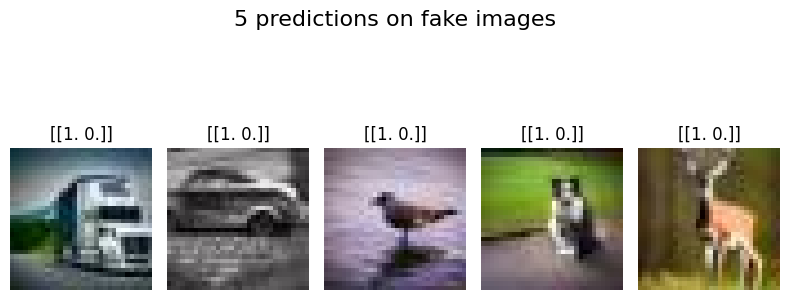

In [ ]:
# Create a figure with 5 subplots side by side
fig, axes = plt.subplots(1, 5, figsize=(8, 4))
fig.suptitle("5 predictions on fake images", fontsize=16)

for i in range(5):
    image = cv2.imread(fake_test_images_path[i])
    test_image = tf.keras.utils.load_img(fake_test_images_path[i], target_size = (64, 64))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    #print(result)
    # Check if the image was loaded successfully
    if image is not None:
        # Displaying the image
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i].set_title(result)
    else:
        print(f"Error loading image {images_path[i]}")

# Remove axis labels and ticks
for ax in axes:
    ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 49ms/step


C:\Users\Yehiam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


1/1 [==============================] - 0s 40ms/step


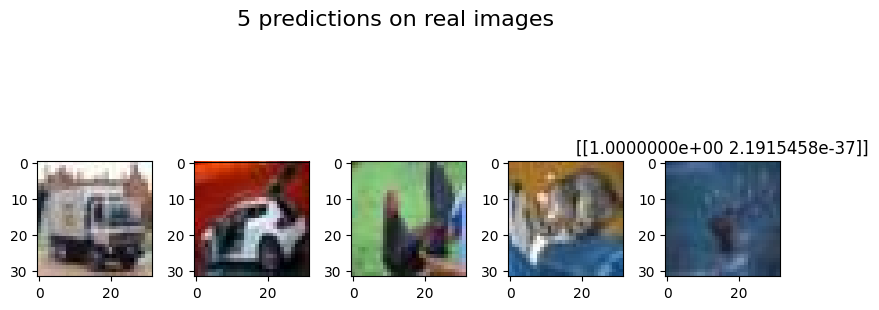

In [ ]:
# Create a figure with 5 subplots side by side
fig, axes = plt.subplots(1, 5, figsize=(8, 4))
fig.suptitle("5 predictions on real images", fontsize=16)

for j in range(5):
    image = cv2.imread(real_test_images_path[j])
    test_image = tf.keras.utils.load_img(real_test_images_path[j], target_size = (64, 64))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)

    # Check if the image was loaded successfully
    if image is not None:
        # Displaying the image
        # Displaying the image
        axes[j].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i].set_title(result)
    else:
        print(f"Error loading image {images_path[j]}")

# Show the plot
plt.tight_layout()
plt.show()

<h1>(4) first analize</h1>

<h1>(5) future thoughts</h1>